In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [72]:
clinic_df = pd.read_csv("/content/drive/MyDrive/Signal_Data/KINZ/ClinicalData80.csv")
kinz_df = pd.read_csv("/content/drive/MyDrive/Signal_Data/KINZ/kinzData_panda_2024-05-06_12-24PM.csv")

In [73]:
clinic_df

,RecordID,Age,Sex,Ethnicity,Race,ZipCode,SmokingStatus,PackyearSmokingHistory,AlcoholUse,FrequencyInPastWeekOfDrinks,...,Complication3Description,Complication4Type,Complication4ClavienDindoAssessmentGrade,Complication4Description,Complication5Type,Complication5ClavienDindoAssessmentGrade,Complication5Description,ComprehensiveComplicationIndexScore,AdditionalNotes,Complete6
0,001-LO,43,Female,Not Hispanic or Latino,White,NaN,No,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
1,002-RJ,77,Female,Not Hispanic or Latino,Black or African American,NaN,No,NaN,No,NaN,...,Numbness in fingers,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,Complete
2,003-RM,48,Male,Hispanic or Latino,White,NaN,Past,3,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7,NaN,Complete
3,004-MF,54,Female,Hispanic or Latino,White,NaN,Past,1,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
4,005-GP,46,Male,Hispanic or Latino,White,NaN,No,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,076-AH,60,Male,Not Hispanic or Latino,Black or African American,11236.0,Past,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
75,077-SK,79,Male,Not Hispanic or Latino,White,12572.0,Past,25.00,Yes,3.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
76,078-SM,81,Male,Not Hispanic or Latino,White,11516.0,Past,30.00,Yes,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
77,079-KO,78,Female,Not Hispanic or Latino,White,11372.0,No,NaN,Yes,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete


In [74]:

clinic_df["TotalFFIScore"].value_counts()

TotalFFIScore
1.0    29
0.0    24
2.0    15
3.0     8
4.0     2
Name: count, dtype: int64

In [75]:
"""clinic_df["OverallFrailtyAssessment"] = clinic_df["OverallFrailtyAssessment"].replace({'Intermediate: 1-2 criteria present': 0,
                                                                                       'Robust: 0 criteria present': 1,
                                                                                       'Frail: ≥3 criteria present': 2})"""

'clinic_df["OverallFrailtyAssessment"] = clinic_df["OverallFrailtyAssessment"].replace({\'Intermediate: 1-2 criteria present\': 0,\n                                                                                       \'Robust: 0 criteria present\': 1,\n                                                                                       \'Frail: ≥3 criteria present\': 2})'

In [76]:
clinic_df["TotalFFIScore"] = clinic_df["TotalFFIScore"].replace({0.0: 0,
                                                                 1.0: 1,
                                                                 2.0: 1,
                                                                 3.0: 1,
                                                                 4.0: 1,})

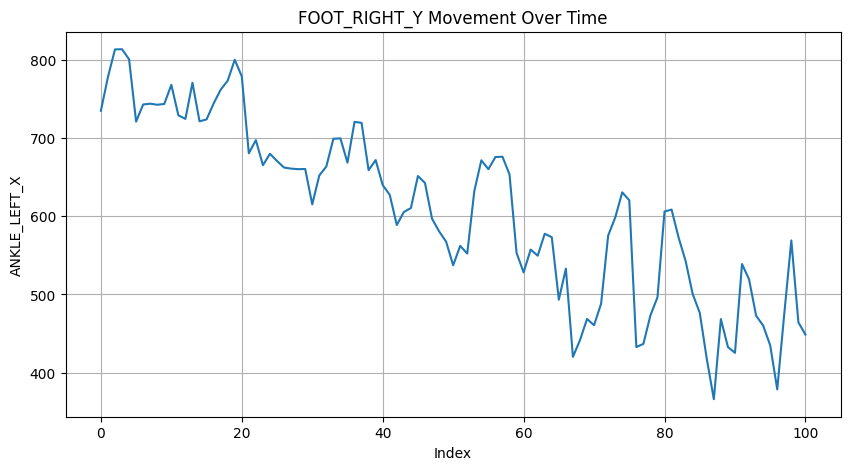

In [77]:
import matplotlib.pyplot as plt

# Select the data
batch_size = 100
column = "FOOT_RIGHT_Y"

data = kinz_df.loc[:batch_size, column]

# Create the line plot
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(data.index, data.values, linestyle='-')  # Plot the data
plt.title(column+' Movement Over Time')  # Add a title
plt.xlabel('Index')  # X-axis label
plt.ylabel('ANKLE_LEFT_X')  # Y-axis label
plt.grid(True)  # Add a grid
plt.show()  # Display the plot


In [78]:
import pandas as pd


columns = kinz_df.columns.tolist()


body_parts = set(part[:-2] for part in columns if part.endswith(('_X', '_Y', '_Z')))
sorted_parts = sorted(body_parts)
new_columns = ['patientID', 'trial_num', 'walking_speed', 'timeStamps']  # Start with these fixed columns
for part in sorted_parts:

    for coord in ['_X', '_Y', '_Z']:
        new_columns.append(part + coord)
kinz_df = kinz_df[new_columns]


In [79]:
kinz_df

,patientID,trial_num,walking_speed,timeStamps,ANKLE_LEFT_X,ANKLE_LEFT_Y,ANKLE_LEFT_Z,ANKLE_RIGHT_X,ANKLE_RIGHT_Y,ANKLE_RIGHT_Z,...,THUMB_LEFT_Z,THUMB_RIGHT_X,THUMB_RIGHT_Y,THUMB_RIGHT_Z,WRIST_LEFT_X,WRIST_LEFT_Y,WRIST_LEFT_Z,WRIST_RIGHT_X,WRIST_RIGHT_Y,WRIST_RIGHT_Z
0,001-LO,1,Regular,0.000000,390.562805,602.859009,1100.335571,463.011200,632.787964,861.115906,...,1145.996216,564.766174,145.974594,1083.058838,413.098236,-4.848353,1048.260864,591.701233,95.389412,988.159851
1,001-LO,1,Regular,0.031953,450.613678,627.286072,1276.520630,482.768677,654.531128,785.082581,...,1157.933228,592.330017,131.384872,1081.694458,424.203186,53.901688,1039.679077,686.942322,95.910889,1071.759644
2,001-LO,1,Regular,0.064029,431.553619,644.666809,1368.638550,522.916382,679.347290,774.065186,...,1171.173462,639.781372,103.950005,1087.459351,422.456421,73.186546,1057.114258,746.073425,74.025307,1121.079712
3,001-LO,1,Regular,0.239935,461.244110,659.211304,1528.767090,644.572632,682.580811,1240.194946,...,1209.790894,718.639771,154.724213,1271.734253,299.355225,68.522301,1184.870972,770.750427,55.768864,1316.004639
4,001-LO,1,Regular,0.271985,462.041687,661.941528,1535.726196,636.041260,666.786926,1293.354126,...,1285.507080,745.663025,155.708374,1342.324951,269.003235,46.742737,1239.554077,784.686951,50.482513,1371.748047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36978,080-TW,4,Fast,6.672006,0.126880,446.535370,1090.030762,-175.127060,434.097626,1092.649170,...,875.477295,-302.459106,-167.914749,858.258667,195.830185,-223.843414,788.262939,-371.584137,-232.415070,762.661682
36979,080-TW,4,Fast,6.704002,0.966503,431.704987,1087.463257,-165.724731,431.496918,1075.524658,...,856.007202,-308.187500,-176.329666,846.691711,194.798309,-232.748657,755.283325,-375.846252,-229.469437,745.169312
36980,080-TW,4,Fast,6.736022,37.078635,385.959290,1084.058466,-113.419082,393.683144,1083.271381,...,828.731496,-307.569259,-176.856063,843.140807,117.694591,-216.364935,737.265767,-350.738825,-215.533525,733.906983
36981,080-TW,4,Fast,6.768004,73.147911,340.267883,1080.657715,-61.175507,355.914246,1091.008911,...,801.488159,-306.951752,-177.381836,839.594116,40.682377,-200.000656,719.269592,-325.661194,-201.614151,722.658020


In [80]:
list(kinz_df.columns)

['patientID',
 'trial_num',
 'walking_speed',
 'timeStamps',
 'ANKLE_LEFT_X',
 'ANKLE_LEFT_Y',
 'ANKLE_LEFT_Z',
 'ANKLE_RIGHT_X',
 'ANKLE_RIGHT_Y',
 'ANKLE_RIGHT_Z',
 'CLAVICLE_LEFT_X',
 'CLAVICLE_LEFT_Y',
 'CLAVICLE_LEFT_Z',
 'CLAVICLE_RIGHT_X',
 'CLAVICLE_RIGHT_Y',
 'CLAVICLE_RIGHT_Z',
 'EAR_LEFT_X',
 'EAR_LEFT_Y',
 'EAR_LEFT_Z',
 'EAR_RIGHT_X',
 'EAR_RIGHT_Y',
 'EAR_RIGHT_Z',
 'ELBOW_LEFT_X',
 'ELBOW_LEFT_Y',
 'ELBOW_LEFT_Z',
 'ELBOW_RIGHT_X',
 'ELBOW_RIGHT_Y',
 'ELBOW_RIGHT_Z',
 'EYE_LEFT_X',
 'EYE_LEFT_Y',
 'EYE_LEFT_Z',
 'EYE_RIGHT_X',
 'EYE_RIGHT_Y',
 'EYE_RIGHT_Z',
 'FOOT_LEFT_X',
 'FOOT_LEFT_Y',
 'FOOT_LEFT_Z',
 'FOOT_RIGHT_X',
 'FOOT_RIGHT_Y',
 'FOOT_RIGHT_Z',
 'HANDTIP_LEFT_X',
 'HANDTIP_LEFT_Y',
 'HANDTIP_LEFT_Z',
 'HANDTIP_RIGHT_X',
 'HANDTIP_RIGHT_Y',
 'HANDTIP_RIGHT_Z',
 'HAND_LEFT_X',
 'HAND_LEFT_Y',
 'HAND_LEFT_Z',
 'HAND_RIGHT_X',
 'HAND_RIGHT_Y',
 'HAND_RIGHT_Z',
 'HEAD_X',
 'HEAD_Y',
 'HEAD_Z',
 'HIP_LEFT_X',
 'HIP_LEFT_Y',
 'HIP_LEFT_Z',
 'HIP_RIGHT_X',
 'HIP_RIGHT

In [81]:
"""feat = ['patientID',
        'trial_num',
        'walking_speed',
        'timeStamps',
        'ANKLE_LEFT_X',
        'ANKLE_LEFT_Y',
        'ANKLE_LEFT_Z',
        'ANKLE_RIGHT_X',
        'ANKLE_RIGHT_Y',
        'ANKLE_RIGHT_Z',
        'FOOT_LEFT_X',
        'FOOT_LEFT_Y',
        'FOOT_LEFT_Z',
        'FOOT_RIGHT_X',
        'FOOT_RIGHT_Y',
        'FOOT_RIGHT_Z',
        'HIP_LEFT_X',
        'HIP_LEFT_Y',
        'HIP_LEFT_Z',
        'HIP_RIGHT_X',
        'HIP_RIGHT_Y',
        'HIP_RIGHT_Z',
        'KNEE_LEFT_X',
        'KNEE_LEFT_Y',
        'KNEE_LEFT_Z',
        'KNEE_RIGHT_X',
        'KNEE_RIGHT_Y',
        'KNEE_RIGHT_Z',

        ]

feat2 = ['patientID',
        'trial_num',
        'walking_speed',
        'timeStamps',
        'ANKLE_LEFT_X',
        'ANKLE_LEFT_Y',
        'ANKLE_LEFT_Z',
        'ANKLE_RIGHT_X',
        'ANKLE_RIGHT_Y',
        'ANKLE_RIGHT_Z',
        'FOOT_LEFT_X',
        'FOOT_LEFT_Y',
        'FOOT_LEFT_Z',
        'FOOT_RIGHT_X',
        'FOOT_RIGHT_Y',
        'FOOT_RIGHT_Z',
        ]




kinz_df = kinz_df[feat2]"""

"feat = ['patientID',\n        'trial_num',\n        'walking_speed',\n        'timeStamps',\n        'ANKLE_LEFT_X',\n        'ANKLE_LEFT_Y',\n        'ANKLE_LEFT_Z',\n        'ANKLE_RIGHT_X',\n        'ANKLE_RIGHT_Y',\n        'ANKLE_RIGHT_Z',\n        'FOOT_LEFT_X',\n        'FOOT_LEFT_Y',\n        'FOOT_LEFT_Z',\n        'FOOT_RIGHT_X',\n        'FOOT_RIGHT_Y',\n        'FOOT_RIGHT_Z',\n        'HIP_LEFT_X',\n        'HIP_LEFT_Y',\n        'HIP_LEFT_Z',\n        'HIP_RIGHT_X',\n        'HIP_RIGHT_Y',\n        'HIP_RIGHT_Z',\n        'KNEE_LEFT_X',\n        'KNEE_LEFT_Y',\n        'KNEE_LEFT_Z',\n        'KNEE_RIGHT_X',\n        'KNEE_RIGHT_Y',\n        'KNEE_RIGHT_Z',\n\n        ]\n\nfeat2 = ['patientID',\n        'trial_num',\n        'walking_speed',\n        'timeStamps',\n        'ANKLE_LEFT_X',\n        'ANKLE_LEFT_Y',\n        'ANKLE_LEFT_Z',\n        'ANKLE_RIGHT_X',\n        'ANKLE_RIGHT_Y',\n        'ANKLE_RIGHT_Z',\n        'FOOT_LEFT_X',\n        'FOOT_LEFT_Y',\n        

In [82]:
kinz_df.shape

(36983, 100)

# Concatenation

In [83]:
target = "TotalFFIScore"

In [84]:
import numpy as np
from tqdm import tqdm


kinz_np = kinz_df.values # converting to np array

new_kinz = []
not_found_sub = []




for i in tqdm(kinz_np):

  # some RecordId name formate is not matching with the main data file....So we have to re formate the name
  sep = i[0].split("-")
  if sep[0].isdigit():
    sub = i[0]
  else:
    sub  = sep[-1]+"-"+sep[0]

  #quearing the TotalFFIScore
  total_ffi_score = clinic_df[clinic_df["RecordID"]==sub][target]

  # Check if total_ffi_score is not empty
  if not total_ffi_score.empty:
    new_row = np.append(i, total_ffi_score.iloc[0])
  else:
    not_found_sub.append(i[0])
    new_row = np.append(i, 'nan')  # Append 'nan' for missing values
    #print("Loop broke!!!")

  new_kinz.append(new_row)




kinz_np = np.array(new_kinz)

100%|██████████| 36983/36983 [00:24<00:00, 1531.63it/s]


In [85]:
set(not_found_sub)

{'015-GE',
 '021-GA',
 '056-STs',
 '064-JH',
 '065-RC',
 '066-SC',
 '076-TH',
 '080-TW',
 'ss'}

In [86]:
"""
sub
clinic_df[clinic_df["RecordID"]=="GE-015"]["TotalFFIScore"]
"""

'\nsub\nclinic_df[clinic_df["RecordID"]=="GE-015"]["TotalFFIScore"]\n'

# Removing NaN

In [87]:


# Create a mask for rows containing NaN values
mask = np.any(kinz_np == 'nan', axis=1)

# Use the mask to select only the rows without NaN values
kinz_np = kinz_np[~mask]

np.where(kinz_np == 'nan')

(array([], dtype=int64), array([], dtype=int64))

In [88]:
kinz_np.shape

(32727, 101)

# Dfined Libraries

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def np_val_count(data,col):
  last_elements = data[:, col]
  value_counts = np.unique(last_elements, return_counts=True)
  for value, count in zip(*value_counts):
      print(f"Value: {value}, Count: {count}")



col_code={
    "Prediction":'#003BCC',
    "Ground Truth":'#CC0900',
    "Nominal Model":'#117A65'
}



def pred_vs_act(pred,act):
  # plot BIS
  plt.figure(figsize=(10, 6))
  plt.plot(pred,label='Prediction',color=col_code['Prediction'])
  plt.plot(act,label='Ground Truth',color=col_code['Ground Truth'])


  plt.xlabel('Time (min)')
  plt.ylabel('BIS')
  plt.title('BIS')
  plt.legend()
  plt.show()




import matplotlib.pyplot as plt
def history_plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  # Plot training and validation accuracy
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  # Plot training and validation loss
  plt.subplot(1, 2, 2)
  plt.plot(epochs, loss, 'r', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.tight_layout()
  plt.show()


def np_Query(data,col_index,value):
  condition = data[:, col_index] == value
  indices = np.where(condition)[0]
  return kinz_np[indices]







from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

def eval_mat(model):
    # Make predictions
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)


    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred_classes)
    print("Confusion Matrix:")
    print(cm)

    # Classification Report (Precision, Recall, F1-score)
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred_classes))

    # Calculate Accuracy
    accuracy = accuracy_score(y_val, y_pred_classes)
    print(f"Accuracy: {accuracy*100:.2f}%")


# Selecting `Fast` for walking speed

In [90]:
kinz_np = np_Query(kinz_np,2,'Fast')
kinz_np

array([['001-LO', 3, 'Fast', ..., 120.7342300415039, 1084.9300537109375,
        1.0],
       ['001-LO', 3, 'Fast', ..., -50.20004653930664, 1345.118896484375,
        1.0],
       ['001-LO', 3, 'Fast', ..., -23.14031219482422, 1365.506591796875,
        1.0],
       ...,
       ['079-KO', 4, 'Fast', ..., -183.87863159179688, 862.876953125,
        1.0],
       ['079-KO', 4, 'Fast', ..., -177.07972717285156, 834.868408203125,
        1.0],
       ['079-KO', 4, 'Fast', ..., -165.88893127441406, 776.75, 1.0]],
      dtype=object)

# Spliting

In [91]:

X_train  = kinz_np[:,4:-1].astype(np.float64)
y_train = kinz_np[:,-1].astype(np.float64)

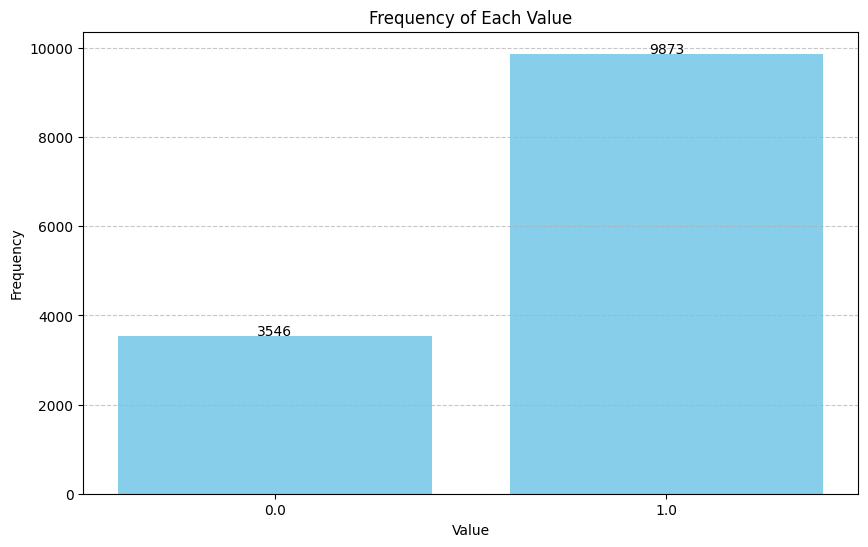

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


series = pd.Series(y_train)

# Get value counts
value_counts = series.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
plt.title('Frequency of Each Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding text labels on the bars
for index, value in enumerate(value_counts.values):
    plt.text(x=index, y=value + 1, s=f"{value}", ha='center')  # Adjust positioning as needed

plt.show()

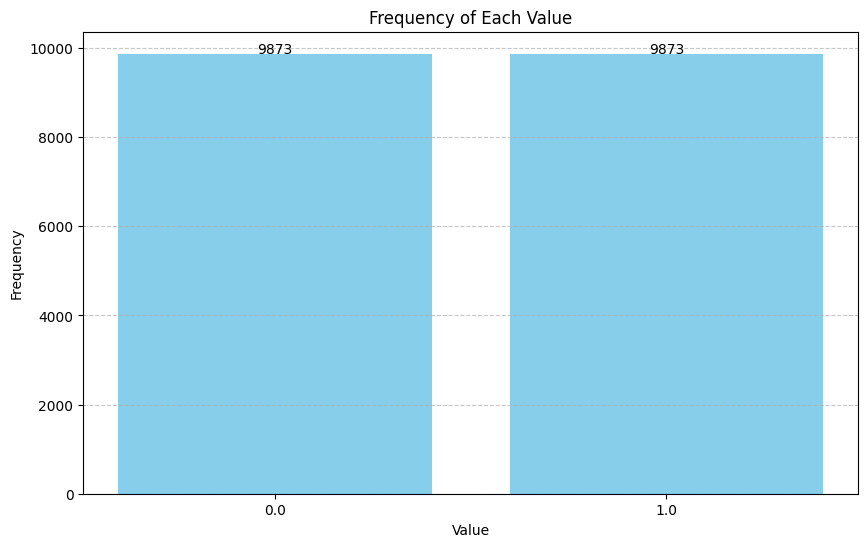

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)






series = pd.Series(y_train)

# Get value counts
value_counts = series.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
plt.title('Frequency of Each Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding text labels on the bars
for index, value in enumerate(value_counts.values):
    plt.text(x=index, y=value + 1, s=f"{value}", ha='center')  # Adjust positioning as needed

plt.show()

# Converting axis - x,y,z into single feature

In [94]:
X_train = X_train.reshape(X_train.shape[0], -1, 3)

#X_val   = X_val.reshape(X_val.shape[0], -1, 3)

In [95]:
n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]

In [96]:
X_train.shape

(19746, 32, 3)

#Models

For classifying signal data from a 3-axis sensor (like accelerometers or gyroscopes), advanced deep learning models are often utilized for their ability to learn complex patterns and features directly from the data. Below are some state-of-the-art models and techniques that are particularly effective for this type of task:

1. **Convolutional Neural Networks (CNNs):**
   - **1D CNNs**: These are highly effective for time-series signal data because they can capture local dependencies and scale invariance in the data. By applying convolution operations along the time dimension, 1D CNNs can extract features from the x, y, and z channels efficiently.
   - **Multi-channel CNNs**: This approach uses separate convolutional branches for each axis of the sensor data, allowing the network to learn axis-specific features before merging the outputs for classification.

2. **Recurrent Neural Networks (RNNs):**
   - **Long Short-Term Memory (LSTM)**: LSTMs are great for time-series data as they can capture long-term dependencies in the data sequence, which is crucial for understanding the context in signal patterns.
   - **Gated Recurrent Units (GRU)**: GRUs are similar to LSTMs but with fewer parameters, making them simpler and faster to train while still capturing temporal dependencies effectively.

3. **Hybrid Models:**
   - **CNN-LSTM**: Combining CNNs with LSTMs leverages the strengths of both architectures—spatial feature extraction by CNNs and temporal dependency modeling by LSTMs. This combination is powerful for complex time-series classification tasks.
   - **Attention-based CNN-RNN**: Integrating attention mechanisms with CNN-RNN structures can help the model focus on the most relevant features of the signal data, improving classification accuracy.

4. **Transformers for Time Series:**
   - Transformers, originally designed for natural language processing, have been adapted for time-series data. They use self-attention mechanisms to weigh the importance of different parts of the signal, making them highly effective for complex patterns that depend on long-range interactions.
   - **Time2Vec + Transformers**: Time2Vec is a technique to encode time series into a vector representation, which can be fed into a transformer model for classification.

5. **Autoencoders:**
   - **Variational Autoencoders (VAE)**: These can be used for feature extraction in an unsupervised manner. The encoded features are then used for classification, typically via a separate classifier like a neural network or SVM.

6. **Temporal Convolutional Networks (TCNs):**
   - TCNs offer an alternative to RNNs with convolutional structures that are specifically adapted to handle sequence data. They have been shown to outperform RNNs in some benchmarks with their ability to handle larger receptive fields and easier training dynamics.

7. **Graph Neural Networks (GNNs):**
   - For sensor data that has an inherent spatial structure (e.g., sensors located in different but related parts of an object or body), GNNs can be used to exploit the relational information among the sensors for more accurate classification.

Each of these models can be tuned and adapted based on the specific characteristics of your data and the complexity of the classification task. It's also important to preprocess your data correctly, normalizing the input signals and possibly augmenting your dataset to improve model robustness. When implementing these models, leveraging libraries like TensorFlow or PyTorch can facilitate experimentation with different architectures and hyperparameters.

In [97]:
EPOCH,BATCH = 200,10

## 1. 1D Convolutional Neural Network (CNN)

In [98]:
"""import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define a function to create the CNN model
def create_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(1, activation='sigmoid')  # Single neuron with sigmoid activation for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


X = np.array(X_train)
y = np.array(y_train)

# Define cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1s = []
confusion_matrices = []

# Perform cross-validation
for train_index, val_index in kfold.split(X, y):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    model = create_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

    history = model.fit(X_train_fold, y_train_fold, epochs=EPOCH, batch_size=BATCH, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop], verbose=0)
    history_plot(history)

    y_val_pred_prob = model.predict(X_val_fold)
    y_val_pred = (y_val_pred_prob > 0.5).astype("int32")

    acc = accuracy_score(y_val_fold, y_val_pred)
    precision = precision_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred)
    f1 = f1_score(y_val_fold, y_val_pred)
    cm = confusion_matrix(y_val_fold, y_val_pred)

    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    confusion_matrices.append(cm)

    print(f'Fold accuracy: {acc}')
    print(f'Fold precision: {precision}')
    print(f'Fold recall: {recall}')
    print(f'Fold F1 score: {f1}')
    print(f'Fold confusion matrix:\n{cm}\n')

print(f'Mean accuracy: {np.mean(accuracies)}')
print(f'Standard deviation of accuracy: {np.std(accuracies)}')
print(f'Mean precision: {np.mean(precisions)}')
print(f'Standard deviation of precision: {np.std(precisions)}')
print(f'Mean recall: {np.mean(recalls)}')
print(f'Standard deviation of recall: {np.std(recalls)}')
print(f'Mean F1 score: {np.mean(f1s)}')
print(f'Standard deviation of F1 score: {np.std(f1s)}')

# Aggregate confusion matrix
total_cm = np.sum(confusion_matrices, axis=0)
print(f'Aggregated confusion matrix:\n{total_cm}')
"""

'import numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout\nfrom tensorflow.keras.callbacks import EarlyStopping\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix\n\n# Define a function to create the CNN model\ndef create_model(input_shape):\n    model = Sequential([\n        Conv1D(filters=64, kernel_size=3, activation=\'relu\', input_shape=input_shape),\n        MaxPooling1D(pool_size=2),\n        Conv1D(filters=128, kernel_size=3, activation=\'relu\'),\n        MaxPooling1D(pool_size=2),\n        Flatten(),\n        Dense(100, activation=\'relu\'),\n        Dense(1, activation=\'sigmoid\')  # Single neuron with sigmoid activation for binary classification\n    ])\n    model.compile(optimizer=\'adam\', loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n    retu

## 2. Long Short-Term Memory (LSTM)

In [99]:
"""import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define a function to create the LSTM model
def create_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(50, activation='relu'),
        Dense(1, activation='sigmoid')  # Single neuron with sigmoid activation for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Assuming X_train and y_train are your feature and label sets
X = np.array(X_train)  # Ensure X_train is a numpy array
y = np.array(y_train)  # Ensure y_train is a numpy array

# Define cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1s = []
confusion_matrices = []

# Perform cross-validation
for train_index, val_index in kfold.split(X, y):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    model = create_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

    history= model.fit(X_train_fold, y_train_fold, epochs=EPOCH, batch_size=BATCH, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop], verbose=0)
    history_plot(history)

    y_val_pred_prob = model.predict(X_val_fold)
    y_val_pred = (y_val_pred_prob > 0.5).astype("int32")

    acc = accuracy_score(y_val_fold, y_val_pred)
    precision = precision_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred)
    f1 = f1_score(y_val_fold, y_val_pred)
    cm = confusion_matrix(y_val_fold, y_val_pred)

    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    confusion_matrices.append(cm)

    print(f'Fold accuracy: {acc}')
    print(f'Fold precision: {precision}')
    print(f'Fold recall: {recall}')
    print(f'Fold F1 score: {f1}')
    print(f'Fold confusion matrix:\n{cm}\n')

print(f'Mean accuracy: {np.mean(accuracies)}')
print(f'Standard deviation of accuracy: {np.std(accuracies)}')
print(f'Mean precision: {np.mean(precisions)}')
print(f'Standard deviation of precision: {np.std(precisions)}')
print(f'Mean recall: {np.mean(recalls)}')
print(f'Standard deviation of recall: {np.std(recalls)}')
print(f'Mean F1 score: {np.mean(f1s)}')
print(f'Standard deviation of F1 score: {np.std(f1s)}')

# Aggregate confusion matrix
total_cm = np.sum(confusion_matrices, axis=0)
print(f'Aggregated confusion matrix:\n{total_cm}')
"""

'import numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM, Dense\nfrom tensorflow.keras.callbacks import EarlyStopping\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix\n\n# Define a function to create the LSTM model\ndef create_model(input_shape):\n    model = Sequential([\n        LSTM(50, return_sequences=True, input_shape=input_shape),\n        LSTM(50),\n        Dense(50, activation=\'relu\'),\n        Dense(1, activation=\'sigmoid\')  # Single neuron with sigmoid activation for binary classification\n    ])\n    model.compile(optimizer=\'adam\', loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n    return model\n\n# Assuming X_train and y_train are your feature and label sets\nX = np.array(X_train)  # Ensure X_train is a numpy array\ny = np.array(y_train)  # Ensure y_train is a numpy array\n\n# 

## 3. CNN-LSTM Hybrid Model

In [100]:
"""import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, InputLayer, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define a function to create the more complex CNN-LSTM model
def create_model(input_shape):
    model = Sequential([
        InputLayer(input_shape=input_shape),

        # First block of Conv1D + MaxPooling
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Second block of Conv1D + MaxPooling
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Third block of Conv1D + MaxPooling
        Conv1D(filters=256, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Adding more LSTM layers
        LSTM(100, return_sequences=True),
        LSTM(50),

        # Adding Dense layers with Dropout for regularization
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(50, activation='relu'),
        Dropout(0.5),

        Dense(1, activation='sigmoid')  # Single neuron with sigmoid activation for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

X = np.array(X_train)
y = np.array(y_train)

# Define cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1s = []
confusion_matrices = []

# Perform cross-validation
for train_index, val_index in kfold.split(X, y):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    model = create_model(input_shape=(X.shape[1], X.shape[2]))

    early_stop = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

    history = model.fit(X_train_fold, y_train_fold, epochs=EPOCH, batch_size=BATCH, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop], verbose=0)
    history_plot(history)

    y_val_pred_prob = model.predict(X_val_fold)
    y_val_pred = (y_val_pred_prob > 0.5).astype("int32")

    acc = accuracy_score(y_val_fold, y_val_pred)
    precision = precision_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred)
    f1 = f1_score(y_val_fold, y_val_pred)
    cm = confusion_matrix(y_val_fold, y_val_pred)

    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    confusion_matrices.append(cm)

    print(f'Fold accuracy: {acc}')
    print(f'Fold precision: {precision}')
    print(f'Fold recall: {recall}')
    print(f'Fold F1 score: {f1}')
    print(f'Fold confusion matrix:\n{cm}\n')

print(f'Mean accuracy: {np.mean(accuracies)}')
print(f'Standard deviation of accuracy: {np.std(accuracies)}')
print(f'Mean precision: {np.mean(precisions)}')
print(f'Standard deviation of precision: {np.std(precisions)}')
print(f'Mean recall: {np.mean(recalls)}')
print(f'Standard deviation of recall: {np.std(recalls)}')
print(f'Mean F1 score: {np.mean(f1s)}')
print(f'Standard deviation of F1 score: {np.std(f1s)}')

# Aggregate confusion matrix
total_cm = np.sum(confusion_matrices, axis=0)
print(f'Aggregated confusion matrix:\n{total_cm}')


# Save the final model
model.save('final_cnn_lstm_model.h5')"""

'import numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, InputLayer, BatchNormalization\nfrom tensorflow.keras.callbacks import EarlyStopping\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix\n\n# Define a function to create the more complex CNN-LSTM model\ndef create_model(input_shape):\n    model = Sequential([\n        InputLayer(input_shape=input_shape),\n\n        # First block of Conv1D + MaxPooling\n        Conv1D(filters=64, kernel_size=3, activation=\'relu\'),\n        BatchNormalization(),\n        MaxPooling1D(pool_size=2),\n\n        # Second block of Conv1D + MaxPooling\n        Conv1D(filters=128, kernel_size=3, activation=\'relu\'),\n        BatchNormalization(),\n        MaxPooling1D(pool_size=2),\n\n        # Third block of Conv1D + MaxPooling\n     

Epoch 1/200
1580/1580 [==============================] - 38s 21ms/step - loss: 0.6517 - accuracy: 0.6045 - val_loss: 0.5906 - val_accuracy: 0.6884
Epoch 2/200
1580/1580 [==============================] - 30s 19ms/step - loss: 0.5867 - accuracy: 0.6919 - val_loss: 0.5337 - val_accuracy: 0.7197
Epoch 3/200
1580/1580 [==============================] - 30s 19ms/step - loss: 0.5326 - accuracy: 0.7337 - val_loss: 0.4928 - val_accuracy: 0.7504
Epoch 4/200
1580/1580 [==============================] - 29s 19ms/step - loss: 0.4951 - accuracy: 0.7599 - val_loss: 0.5485 - val_accuracy: 0.7375
Epoch 5/200
1580/1580 [==============================] - 29s 19ms/step - loss: 0.4567 - accuracy: 0.7858 - val_loss: 0.5888 - val_accuracy: 0.7334
Epoch 6/200
1580/1580 [==============================] - 29s 19ms/step - loss: 0.4341 - accuracy: 0.8046 - val_loss: 0.4040 - val_accuracy: 0.8010
Epoch 7/200
1580/1580 [==============================] - 30s 19ms/step - loss: 0.4074 - accuracy: 0.8184 - val_loss: 0

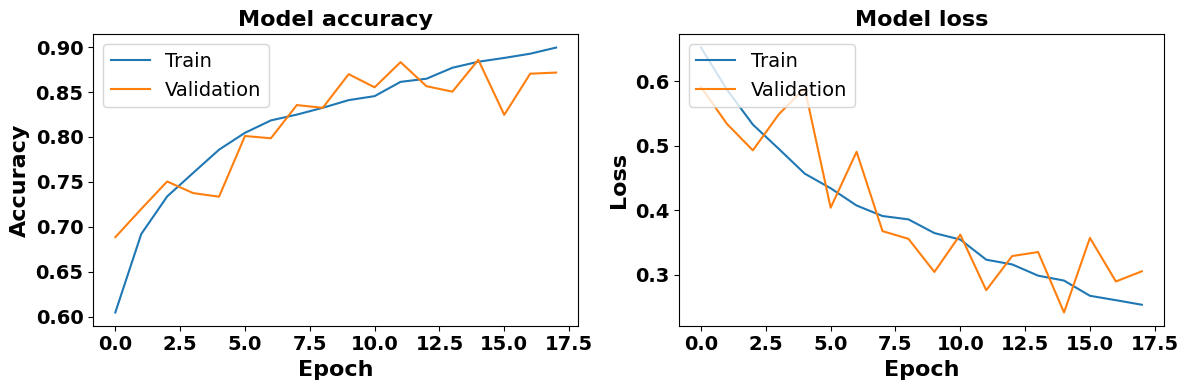

124/124 [==============================] - 2s 6ms/step
Fold accuracy: 0.8858227848101266
Fold precision: 0.8649425287356322
Fold recall: 0.9144303797468355
Fold F1 score: 0.8889982771351218
Fold confusion matrix:
[[1693  282]
 [ 169 1806]]

Epoch 1/200
1580/1580 [==============================] - 41s 22ms/step - loss: 0.6357 - accuracy: 0.6322 - val_loss: 0.6077 - val_accuracy: 0.6678
Epoch 2/200
1580/1580 [==============================] - 35s 22ms/step - loss: 0.5524 - accuracy: 0.7165 - val_loss: 0.5348 - val_accuracy: 0.7326
Epoch 3/200
1580/1580 [==============================] - 33s 21ms/step - loss: 0.5074 - accuracy: 0.7534 - val_loss: 0.5431 - val_accuracy: 0.7083
Epoch 4/200
1580/1580 [==============================] - 33s 21ms/step - loss: 0.4801 - accuracy: 0.7722 - val_loss: 0.6557 - val_accuracy: 0.6875
Epoch 5/200
1580/1580 [==============================] - 32s 20ms/step - loss: 0.4526 - accuracy: 0.7855 - val_loss: 0.4355 - val_accuracy: 0.7713
Epoch 6/200
1580/1580 [=

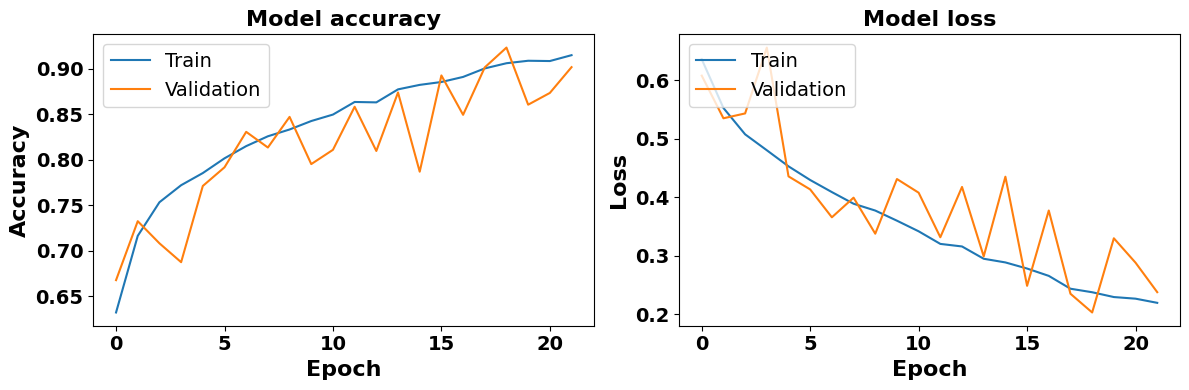

124/124 [==============================] - 2s 7ms/step
Fold accuracy: 0.9235249430235503
Fold precision: 0.9205630970336852
Fold recall: 0.9270886075949367
Fold F1 score: 0.9238143289606457
Fold confusion matrix:
[[1816  158]
 [ 144 1831]]

Epoch 1/200
1580/1580 [==============================] - 38s 20ms/step - loss: 0.6500 - accuracy: 0.6143 - val_loss: 0.6756 - val_accuracy: 0.6419
Epoch 2/200
1580/1580 [==============================] - 32s 20ms/step - loss: 0.5982 - accuracy: 0.6761 - val_loss: 0.5691 - val_accuracy: 0.6966
Epoch 3/200
1580/1580 [==============================] - 32s 20ms/step - loss: 0.5481 - accuracy: 0.7200 - val_loss: 0.4793 - val_accuracy: 0.7599
Epoch 4/200
1580/1580 [==============================] - 32s 20ms/step - loss: 0.5076 - accuracy: 0.7472 - val_loss: 0.4598 - val_accuracy: 0.7820
Epoch 5/200
1580/1580 [==============================] - 32s 20ms/step - loss: 0.4807 - accuracy: 0.7688 - val_loss: 0.4169 - val_accuracy: 0.8058
Epoch 6/200
1580/1580 [=

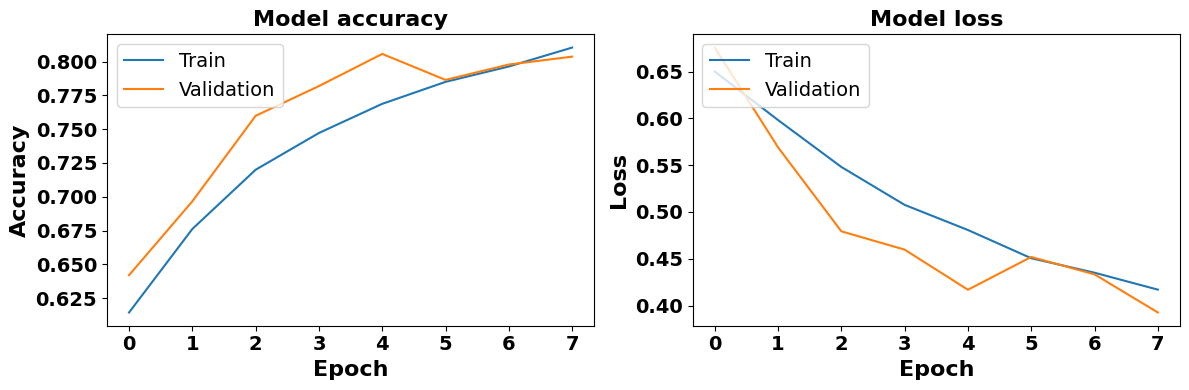

124/124 [==============================] - 3s 11ms/step
Fold accuracy: 0.8057736135730564
Fold precision: 0.8435722411831627
Fold recall: 0.7508860759493671
Fold F1 score: 0.7945352263594964
Fold confusion matrix:
[[1699  275]
 [ 492 1483]]

Epoch 1/200
1580/1580 [==============================] - 39s 21ms/step - loss: 0.6411 - accuracy: 0.6277 - val_loss: 0.6035 - val_accuracy: 0.6731
Epoch 2/200
1580/1580 [==============================] - 30s 19ms/step - loss: 0.5584 - accuracy: 0.7062 - val_loss: 0.5362 - val_accuracy: 0.7146
Epoch 3/200
1580/1580 [==============================] - 30s 19ms/step - loss: 0.5252 - accuracy: 0.7390 - val_loss: 0.4733 - val_accuracy: 0.7582
Epoch 4/200
1580/1580 [==============================] - 30s 19ms/step - loss: 0.4889 - accuracy: 0.7632 - val_loss: 0.5116 - val_accuracy: 0.7556
Epoch 5/200
1580/1580 [==============================] - 31s 19ms/step - loss: 0.4650 - accuracy: 0.7765 - val_loss: 0.4581 - val_accuracy: 0.7635
Epoch 6/200
1580/1580 [

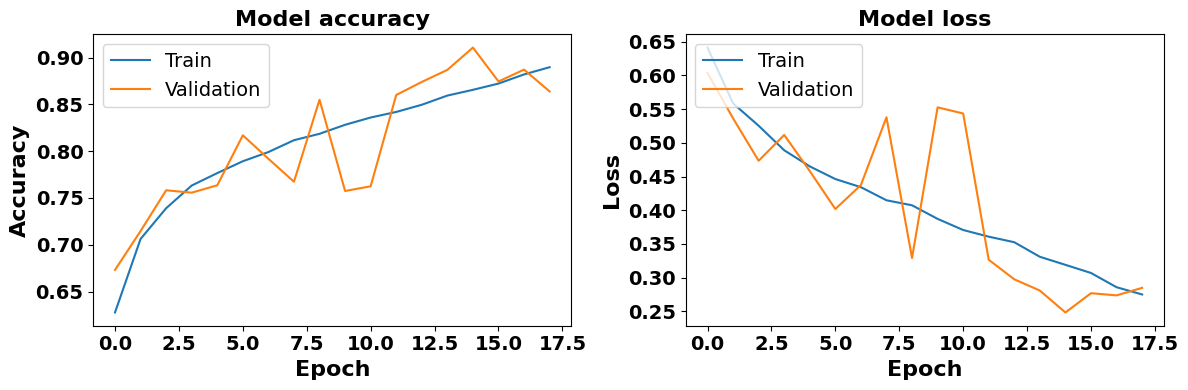

124/124 [==============================] - 3s 10ms/step
Fold accuracy: 0.9106102810838187
Fold precision: 0.9184305627258648
Fold recall: 0.9012158054711246
Fold F1 score: 0.909741754027103
Fold confusion matrix:
[[1817  158]
 [ 195 1779]]

Epoch 1/200
1580/1580 [==============================] - 43s 23ms/step - loss: 0.6408 - accuracy: 0.6244 - val_loss: 0.5848 - val_accuracy: 0.6860
Epoch 2/200
1580/1580 [==============================] - 35s 22ms/step - loss: 0.5670 - accuracy: 0.7051 - val_loss: 0.6004 - val_accuracy: 0.6427
Epoch 3/200
1580/1580 [==============================] - 35s 22ms/step - loss: 0.5274 - accuracy: 0.7336 - val_loss: 0.6470 - val_accuracy: 0.6331
Epoch 4/200
1580/1580 [==============================] - 36s 23ms/step - loss: 0.4964 - accuracy: 0.7592 - val_loss: 0.4494 - val_accuracy: 0.7792
Epoch 5/200
1580/1580 [==============================] - 35s 22ms/step - loss: 0.4650 - accuracy: 0.7812 - val_loss: 0.4349 - val_accuracy: 0.7934
Epoch 6/200
1580/1580 [=

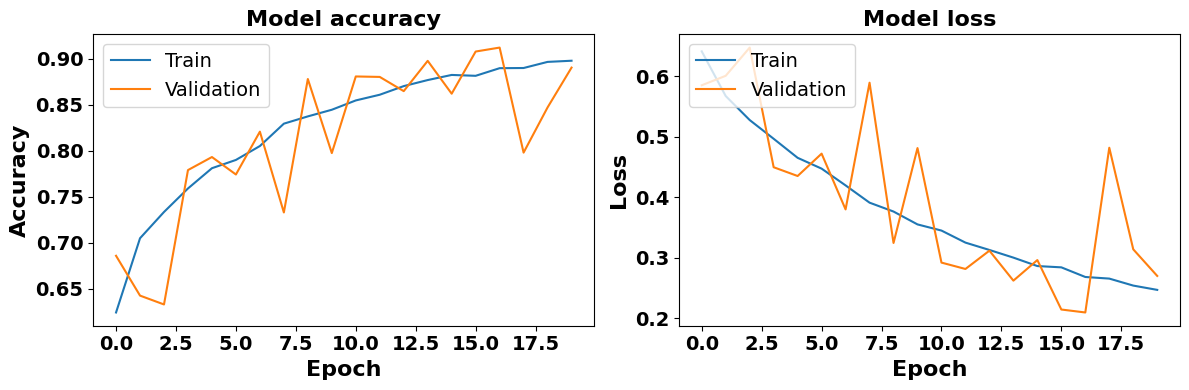

124/124 [==============================] - 2s 8ms/step
Fold accuracy: 0.9123828817422133
Fold precision: 0.9352941176470588
Fold recall: 0.8860182370820668
Fold F1 score: 0.9099895941727366
Fold confusion matrix:
[[1854  121]
 [ 225 1749]]

Mean accuracy: 0.887622900846553
Standard deviation of accuracy: 0.04273869249644624
Mean precision: 0.8965605094650808
Standard deviation of precision: 0.035671190401603825
Mean recall: 0.8759278211688661
Standard deviation of recall: 0.06399470255528145
Mean F1 score: 0.8854158361310207
Standard deviation of F1 score: 0.04678072943714848
Aggregated confusion matrix:
[[8879  994]
 [1225 8648]]


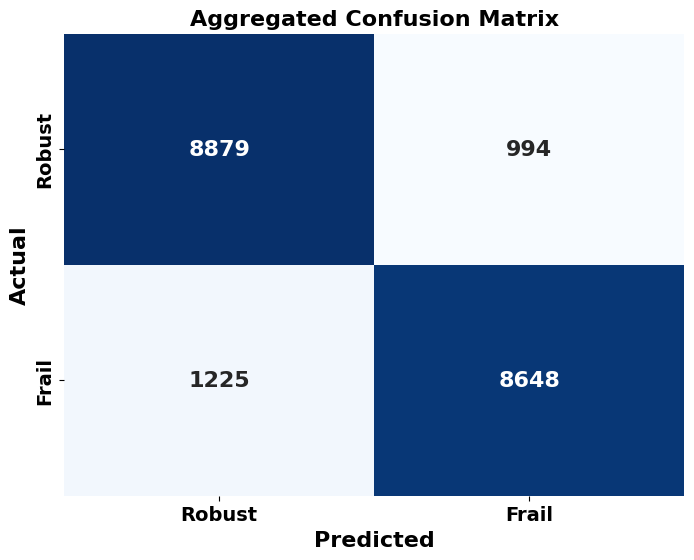

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, InputLayer, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import seaborn as sns

# Define a function to create the more complex CNN-LSTM model
def create_model(input_shape):
    model = Sequential([
        InputLayer(input_shape=input_shape),

        # First block of Conv1D + MaxPooling
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Second block of Conv1D + MaxPooling
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Third block of Conv1D + MaxPooling
        Conv1D(filters=256, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        # Adding more LSTM layers
        LSTM(100, return_sequences=True),
        LSTM(50),

        # Adding Dense layers with Dropout for regularization
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(50, activation='relu'),
        Dropout(0.5),

        Dense(1, activation='sigmoid')  # Single neuron with sigmoid activation for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model accuracy', fontsize=16, fontweight='bold')
    plt.ylabel('Accuracy', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch', fontsize=16, fontweight='bold')
    plt.legend(loc='upper left', fontsize=14)
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model loss', fontsize=16, fontweight='bold')
    plt.ylabel('Loss', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch', fontsize=16, fontweight='bold')
    plt.legend(loc='upper left', fontsize=14)
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(cm, class_names, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names,
                annot_kws={"size": 16, "weight": 'bold'})
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Predicted', fontsize=16, fontweight='bold')
    plt.ylabel('Actual', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.show()

# Assuming X_train and y_train are defined
X = np.array(X_train)
y = np.array(y_train)

EPOCH = 200
BATCH = 10

# Define cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1s = []
confusion_matrices = []

# Perform cross-validation
for train_index, val_index in kfold.split(X, y):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    model = create_model(input_shape=(X.shape[1], X.shape[2]))

    # Plot model architecture
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

    early_stop = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

    history = model.fit(X_train_fold, y_train_fold, epochs=EPOCH, batch_size=BATCH, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop], verbose=1)
    plot_history(history)

    y_val_pred_prob = model.predict(X_val_fold)
    y_val_pred = (y_val_pred_prob > 0.5).astype("int32")

    acc = accuracy_score(y_val_fold, y_val_pred)
    precision = precision_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred)
    f1 = f1_score(y_val_fold, y_val_pred)
    cm = confusion_matrix(y_val_fold, y_val_pred)

    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    confusion_matrices.append(cm)

    print(f'Fold accuracy: {acc}')
    print(f'Fold precision: {precision}')
    print(f'Fold recall: {recall}')
    print(f'Fold F1 score: {f1}')
    print(f'Fold confusion matrix:\n{cm}\n')

print(f'Mean accuracy: {np.mean(accuracies)}')
print(f'Standard deviation of accuracy: {np.std(accuracies)}')
print(f'Mean precision: {np.mean(precisions)}')
print(f'Standard deviation of precision: {np.std(precisions)}')
print(f'Mean recall: {np.mean(recalls)}')
print(f'Standard deviation of recall: {np.std(recalls)}')
print(f'Mean F1 score: {np.mean(f1s)}')
print(f'Standard deviation of F1 score: {np.std(f1s)}')

# Aggregate confusion matrix
total_cm = np.sum(confusion_matrices, axis=0)
print(f'Aggregated confusion matrix:\n{total_cm}')

# Plot the aggregated confusion matrix
plot_confusion_matrix(total_cm, class_names=['Robust', 'Frail'], title='Aggregated Confusion Matrix')

# Save the final model
model.save('final_cnn_lstm_model.h5')

## 4. Transformer for Time Series

In [ ]:
"""!pip install keras-nlp
"""

'!pip install keras-nlp\n'

In [ ]:
"""import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras_nlp.layers import TransformerEncoder

# Define a function to create the Transformer-based model
def create_model(input_shape):
    input_layer = Input(shape=input_shape)
    transformer_layer = TransformerEncoder(num_heads=2, intermediate_dim=128)(input_layer)
    x = Flatten()(transformer_layer)
    output_layer = Dense(1, activation='sigmoid')(x)  # Single neuron with sigmoid activation for binary classification
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


X = np.array(X_train)
y = np.array(y_train)

# Define cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1s = []
confusion_matrices = []

# Perform cross-validation
for train_index, val_index in kfold.split(X, y):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    model = create_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

    history = model.fit(X_train_fold, y_train_fold, epochs=EPOCH, batch_size=BATCH, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop], verbose=0)
    history_plot(history)

    y_val_pred_prob = model.predict(X_val_fold)
    y_val_pred = (y_val_pred_prob > 0.5).astype("int32")

    acc = accuracy_score(y_val_fold, y_val_pred)
    precision = precision_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred)
    f1 = f1_score(y_val_fold, y_val_pred)
    cm = confusion_matrix(y_val_fold, y_val_pred)

    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    confusion_matrices.append(cm)

    print(f'Fold accuracy: {acc}')
    print(f'Fold precision: {precision}')
    print(f'Fold recall: {recall}')
    print(f'Fold F1 score: {f1}')
    print(f'Fold confusion matrix:\n{cm}\n')

print(f'Mean accuracy: {np.mean(accuracies)}')
print(f'Standard deviation of accuracy: {np.std(accuracies)}')
print(f'Mean precision: {np.mean(precisions)}')
print(f'Standard deviation of precision: {np.std(precisions)}')
print(f'Mean recall: {np.mean(recalls)}')
print(f'Standard deviation of recall: {np.std(recalls)}')
print(f'Mean F1 score: {np.mean(f1s)}')
print(f'Standard deviation of F1 score: {np.std(f1s)}')

# Aggregate confusion matrix
total_cm = np.sum(confusion_matrices, axis=0)
print(f'Aggregated confusion matrix:\n{total_cm}')
"""

'import numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.layers import Input, Dense, Flatten\nfrom tensorflow.keras.callbacks import EarlyStopping\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix\nfrom keras_nlp.layers import TransformerEncoder\n\n# Define a function to create the Transformer-based model\ndef create_model(input_shape):\n    input_layer = Input(shape=input_shape)\n    transformer_layer = TransformerEncoder(num_heads=2, intermediate_dim=128)(input_layer)\n    x = Flatten()(transformer_layer)\n    output_layer = Dense(1, activation=\'sigmoid\')(x)  # Single neuron with sigmoid activation for binary classification\n    model = Model(inputs=input_layer, outputs=output_layer)\n    model.compile(optimizer=\'adam\', loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n    return model\n\n\nX = np.array(X_train)\ny = 

In [ ]:
"""import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras_nlp.layers import TransformerEncoder

# Define a function to create the Transformer-based model
def create_model(input_shape):
    input_layer = Input(shape=input_shape)
    x = input_layer

    # Add multiple TransformerEncoder layers with reduced number of heads
    for _ in range(3):  # Adding 3 Transformer layers for more complexity
        x = TransformerEncoder(num_heads=2, intermediate_dim=128, dropout=0.1)(x)

    x = Flatten()(x)

    # Additional Dense layers with Dropout
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)

    output_layer = Dense(1, activation='sigmoid')(x)  # Single neuron with sigmoid activation for binary classification
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

X = np.array(X_train)
y = np.array(y_train)

# Define cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1s = []
confusion_matrices = []

# Perform cross-validation
for train_index, val_index in kfold.split(X, y):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    model = create_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    early_stop = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

    history = model.fit(X_train_fold, y_train_fold, epochs=EPOCH, batch_size=BATCH, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop], verbose=0)
    history_plot(history)

    y_val_pred_prob = model.predict(X_val_fold)
    y_val_pred = (y_val_pred_prob > 0.5).astype("int32")

    acc = accuracy_score(y_val_fold, y_val_pred)
    precision = precision_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred)
    f1 = f1_score(y_val_fold, y_val_pred)
    cm = confusion_matrix(y_val_fold, y_val_pred)

    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    confusion_matrices.append(cm)

    print(f'Fold accuracy: {acc}')
    print(f'Fold precision: {precision}')
    print(f'Fold recall: {recall}')
    print(f'Fold F1 score: {f1}')
    print(f'Fold confusion matrix:\n{cm}\n')

print(f'Mean accuracy: {np.mean(accuracies)}')
print(f'Standard deviation of accuracy: {np.std(accuracies)}')
print(f'Mean precision: {np.mean(precisions)}')
print(f'Standard deviation of precision: {np.std(precisions)}')
print(f'Mean recall: {np.mean(recalls)}')
print(f'Standard deviation of recall: {np.std(recalls)}')
print(f'Mean F1 score: {np.mean(f1s)}')
print(f'Standard deviation of F1 score: {np.std(f1s)}')

# Aggregate confusion matrix
total_cm = np.sum(confusion_matrices, axis=0)
print(f'Aggregated confusion matrix:\n{total_cm}')
"""

'import numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.layers import Input, Dense, Flatten, Dropout\nfrom tensorflow.keras.callbacks import EarlyStopping\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix\nfrom keras_nlp.layers import TransformerEncoder\n\n# Define a function to create the Transformer-based model\ndef create_model(input_shape):\n    input_layer = Input(shape=input_shape)\n    x = input_layer\n\n    # Add multiple TransformerEncoder layers with reduced number of heads\n    for _ in range(3):  # Adding 3 Transformer layers for more complexity\n        x = TransformerEncoder(num_heads=2, intermediate_dim=128, dropout=0.1)(x)\n\n    x = Flatten()(x)\n\n    # Additional Dense layers with Dropout\n    x = Dense(128, activation=\'relu\')(x)\n    x = Dropout(0.3)(x)\n    x = Dense(64, activation=\'relu\')(x)\n    x = D